# CITS4403 Project
### By Dominic Davies (23431003) and Jingwei Luo (23875736)

This notebook explores a variety of infection modelling tests from varying starting conditions to explore what causes an infection to spread explosively, or hardly at all.

In [22]:
# Fix relative importing
import sys, os
sys.path.append(os.path.abspath(".."))

# Import relevant libraries
import matplotlib.pyplot as plt
from src.model import InfectionModel
from src.visualisation import run_simulation
from utils.config import SimulationConfig, PopulationConfig

This first simulation uses an initial state of *128* people, with just *1* person being infected. A person susceptible to the infection is yellow, and an infected person appears red. After being infected for sometime, a person recovers which makes them immune to the infection for the rest of the simulation, and turns them grey.

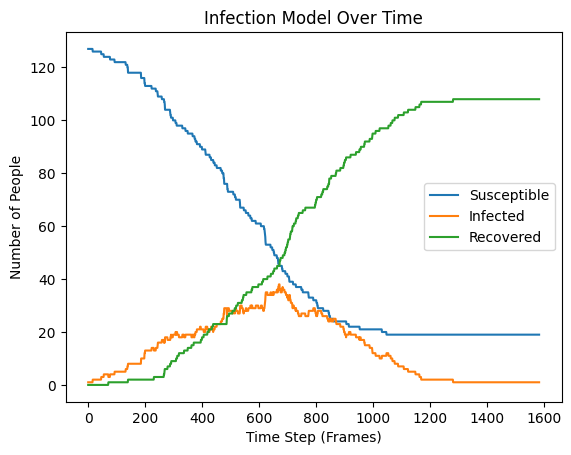

--- RESULTS HEAD ---
   Susceptible  Infected  Recovered  Vaccinated  Total
0          127         1          0           0    128
1          127         1          0           0    128
2          127         1          0           0    128
3          127         1          0           0    128
4          127         1          0           0    128

--- RESULTS TAIL ---
      Susceptible  Infected  Recovered  Vaccinated  Total
1580           19         1        108           0    128
1581           19         1        108           0    128
1582           19         1        108           0    128
1583           19         1        108           0    128
1584           19         1        108           0    128

--- PEAK INFECTION ---
Max infected: 38 people at step 670


In [29]:
# 128 people, 1 infected, 0 vaccinated
population = PopulationConfig(
    num_people = 128,
    initial_infected = 1,
    vaccinated_rate = 0.0,
)

config = SimulationConfig(population=population)
model = InfectionModel(config=config)
run_simulation(model)

def show_results(model):
    # Get results from Mesa and show in graph
    results = model.datacollector.get_model_vars_dataframe()
    results.plot(y=["Susceptible", "Infected", "Recovered"])
    plt.xlabel("Time Step (Frames)")
    plt.ylabel("Number of People")
    plt.title("Infection Model Over Time")
    plt.show()
    
    # Get max infected
    max_infected = results["Infected"].max()
    max_infected_step = results["Infected"].idxmax()
    
    # Print results
    print("--- RESULTS HEAD ---")
    print(results.head())
    print()
    print("--- RESULTS TAIL ---")
    print(results.tail())
    print()
    print("--- PEAK INFECTION ---")
    print(f"Max infected: {max_infected} people at step {max_infected_step}")

show_results(model)

Clearly this doesn't turn out very well for the population, as *108* people became infected out of the *127* that were susceptible. The maximum number of infected people occured before the halfway point of the simulation, with *38* people infected at step *670*.

This shows that the time taken to recover from the infection was *too slow* to meaningfully decrease the rate of infection. This lead to just about the entire population becoming infected.

Let's compare this to a similar set of conditions but with *20%* of the population now vaccinated against the infection. Vaccinated people appear blue and are immune to the infection for the entire simulation.

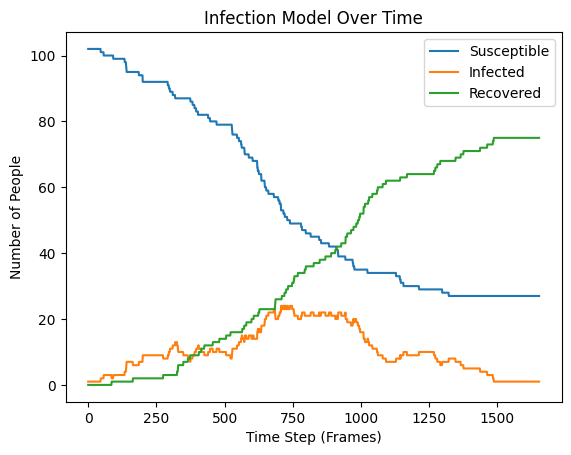

--- RESULTS HEAD ---
   Susceptible  Infected  Recovered  Vaccinated  Total
0          102         1          0          25    128
1          102         1          0          25    128
2          102         1          0          25    128
3          102         1          0          25    128
4          102         1          0          25    128

--- RESULTS TAIL ---
      Susceptible  Infected  Recovered  Vaccinated  Total
1649           27         1         75          25    128
1650           27         1         75          25    128
1651           27         1         75          25    128
1652           27         1         75          25    128
1653           27         1         75          25    128

--- PEAK INFECTION ---
Max infected: 24 people at step 707


In [30]:
# 128 people, 1 infected, 20% vaccinated
population = PopulationConfig(
    num_people = 128,
    initial_infected = 1,
    vaccinated_rate = 0.2,
)

config = SimulationConfig(population=population)
model = InfectionModel(config=config)
run_simulation(model)
show_results(model)

This time *75* people became infected out of the *102* that were susceptible. That's *73.5%* of the population compared to the last simulation where *108* people became infected out of the *127*; *84.4%* of the population. The peak infection also droped to *24* people at step *707* out of *1653*.

This shows that a rate of just *20%* of people vaccinated is able to reduce the quantity of people that became infected by *10.9* percentage points. That is a noticeable difference, however the infection still managed to spread to a fair majority of the population.

Now let's compare two new sets of conditions with *60%* of people beginning vaccinated, followed by *65%* of people beginning vaccinated.

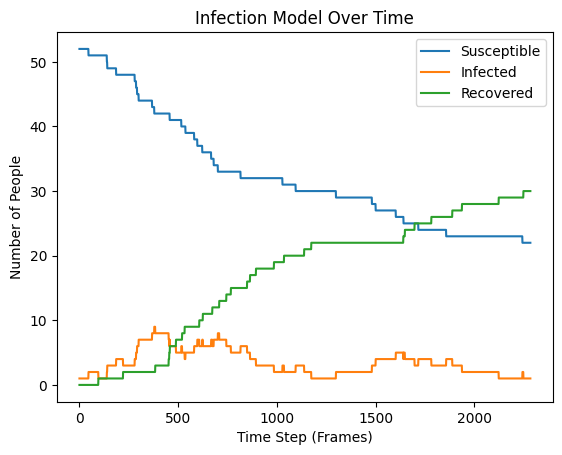

--- RESULTS HEAD ---
   Susceptible  Infected  Recovered  Vaccinated  Total
0           52         1          0          75    128
1           52         1          0          75    128
2           52         1          0          75    128
3           52         1          0          75    128
4           52         1          0          75    128

--- RESULTS TAIL ---
      Susceptible  Infected  Recovered  Vaccinated  Total
2279           22         1         30          75    128
2280           22         1         30          75    128
2281           22         1         30          75    128
2282           22         1         30          75    128
2283           22         1         30          75    128

--- PEAK INFECTION ---
Max infected: 9 people at step 379


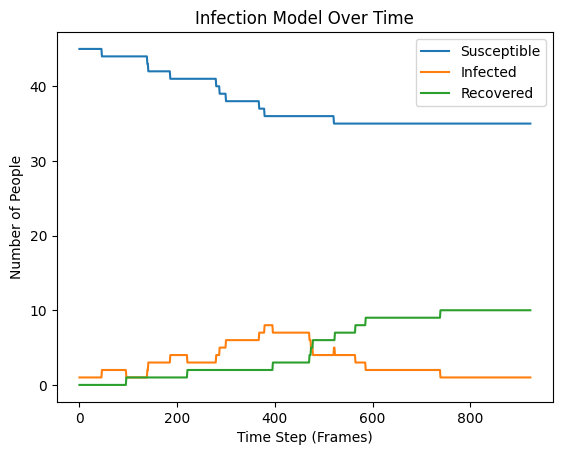

--- RESULTS HEAD ---
   Susceptible  Infected  Recovered  Vaccinated  Total
0           45         1          0          82    128
1           45         1          0          82    128
2           45         1          0          82    128
3           45         1          0          82    128
4           45         1          0          82    128

--- RESULTS TAIL ---
     Susceptible  Infected  Recovered  Vaccinated  Total
919           35         1         10          82    128
920           35         1         10          82    128
921           35         1         10          82    128
922           35         1         10          82    128
923           35         1         10          82    128

--- PEAK INFECTION ---
Max infected: 8 people at step 379


In [45]:
# 128 people, 1 infected, 60% vaccinated
population = PopulationConfig(
    num_people = 128,
    initial_infected = 1,
    vaccinated_rate = 0.60,
)

config = SimulationConfig(population=population)
model = InfectionModel(config=config)
run_simulation(model)
show_results(model)

# 128 people, 1 infected, 65% vaccinated
population = PopulationConfig(
    num_people = 128,
    initial_infected = 1,
    vaccinated_rate = 0.65,
)

config = SimulationConfig(population=population)
model = InfectionModel(config=config)
run_simulation(model)
show_results(model)

Here we can see the effect of *herd immunity*, where we get a substantial change in the number of people that become infected from a small change in the number of people that began vaccinated. With *60%* vaccinated, 30 out of the 52 susceptible became infected; 57.7% of the population. However, with *65%* vaccinated, only *10* out of the *45* susceptible became infected; 22.2% of the population.

This shows that there is a critical point in our infection model that causes a great amount of infection spread in a population. The critical point seems to be avoided somewhere between *60%* and *65%* of the population being vaccinated to the infection. It should also be noted that the max infected for *60%* was *9* and for *65%* was *8*, these are similar values. It seems that the max infected isn't the direct cause of this increased spread but instead the continued ability for new people to become sick at all. The general trend of the first infection's line shows two maximums, compared to the second infection's single maximum. This could be caused by the infection beginning in a small area of infection, then finally making it to the rest of the space before running out of new people to spread to. The second infection never got to this point due to the *herd immunity* at play.